<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/3_1_RNN_(%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D0%B0%D1%8F_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#RNN (Рекуррентная нейронная сеть)

### Прямой проход (Pass Forward)

Рекуррентная нейронная сеть (RNN) обрабатывает последовательные данные, на каждом шаге обновляя своё скрытое состояние и генерируя выходные значения. Рассмотрим поэтапный расчет скрытых состояний и итогового выхода на простом примере.

Для входного сигнала на первом шаге:
$$
O_1 = f(x_{11} \cdot W_i + O_0 \cdot W_h)
$$
где:
- $x_{11}$ — входное значение на первом временном шаге,
- $O_0$ — начальное скрытое состояние (часто берется равным нулю),
- $W_i$ — весовая матрица для входа,
- $W_h$ — весовая матрица для рекуррентных соединений,
- $f$ — функция активации (например, $tanh$).

На втором шаге:
$$
O_2 = f(x_{12} \cdot W_i + O_1 \cdot W_h)
$$
На третьем шаге:
$$
O_3 = f(x_{13} \cdot W_i + O_2 \cdot W_h)
$$

Итоговый выход $\hat{y}$, с использованием функции активации $\sigma$ (например, softmax), вычисляется как:
$$
\hat{y} = \sigma(O_3 \cdot W_0)
$$
где $W_0$ — это весовая матрица для выхода.

### Общий вид рекуррентной связи

В общем случае, для любого временного шага $t$:
$$
O_t = f(W_i \cdot x_t + W_h \cdot O_{t-1})
$$
И итоговый выход:
$$
\hat{y}_t = \sigma(W_0 \cdot O_t)
$$

Здесь:
- $W_i \in \mathbb{R}^{3 \times 3}$ — весовая матрица для входа (размерность 3x3),
- $W_h \in \mathbb{R}^{3 \times 3}$ — весовая матрица для рекуррентных связей (размерность 3x3),
- $W_0 \in \mathbb{R}^{3 \times 1}$ — весовая матрица для выхода (размерность 3x1),
- $f$ — функция активации, например, $tanh$,
- $\sigma$ — функция активации на выходе, например, softmax.

### Обучение и минимизация функции потерь

Цель обучения сети заключается в минимизации функции потерь $L$, которая может быть, например, кросс-энтропией для задачи классификации. Для обновления весов используем градиентный спуск. На каждом шаге обновляются весовые матрицы с учетом вычисленного градиента.

Для матрицы $W_i$:
$$
W_i = W_i - \eta \frac{\partial L}{\partial W_i}
$$
Для матрицы $W_h$:
$$
W_h = W_h - \eta \frac{\partial L}{\partial W_h}
$$
Для матрицы $W_0$:
$$
W_0 = W_0 - \eta \frac{\partial L}{\partial W_0}
$$
где $\eta$ — это скорость обучения, а $\frac{\partial L}{\partial W_i}, \frac{\partial L}{\partial W_h}, \frac{\partial L}{\partial W_0}$ — градиенты функции потерь по соответствующим весовым матрицам.

Таким образом, обучение RNN включает в себя два ключевых процесса: прямой проход, при котором вычисляются выходы сети, и обратное распространение ошибки (backpropagation through time), где вычисляются градиенты и обновляются параметры модели.


### Backpropagation Through Time (Обратное распространение ошибки во времени)

При обучении рекуррентных нейронных сетей используется метод **Backpropagation Through Time (BPTT)**, который представляет собой расширение метода обратного распространения ошибки для работы с временными последовательностями. Основная задача — вычислить градиенты для всех весов с учетом временной зависимости скрытых состояний.

#### 1) Вычисление градиента для $W_0$

Начнем с вычисления градиента функции потерь $L$ по весам выхода $W_0$. Используя правило цепочки, мы можем выразить градиент следующим образом:
$$
\frac{\partial L}{\partial W_0} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial W_0}
$$
где:
- $\frac{\partial L}{\partial \hat{y}}$ — градиент функции потерь по предсказанному выходу,
- $\frac{\partial \hat{y}}{\partial W_0}$ — производная выхода по весам $W_0$.

#### 2) Вычисление градиента для $W_i$

Теперь рассмотрим градиент по весам $W_i$, отвечающим за обработку входных данных. Так как скрытые состояния $O_t$ на каждом шаге зависят друг от друга, градиент будет содержать несколько слагаемых, соответствующих каждому временному шагу. Рассчитаем градиент для $W_i$:
$$
\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial W_i} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2} \cdot \frac{\partial O_2}{\partial W_i} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2} \cdot \frac{\partial O_2}{\partial O_1} \cdot \frac{\partial O_1}{\partial W_i}
$$

Для упрощения введем обозначения для производных скрытых состояний:
$$
\frac{\partial \hat{y}}{\partial O_1} = \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2} \cdot \frac{\partial O_2}{\partial O_1}
$$
$$
\frac{\partial \hat{y}}{\partial O_2} = \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2}
$$

Тогда можно выразить градиент через сумму:
$$
\frac{\partial L}{\partial W_i} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial W_i} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_2} \cdot \frac{\partial O_2}{\partial W_i} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_1} \cdot \frac{\partial O_1}{\partial W_i}
$$

Или, обобщая на несколько временных шагов:
$$
\frac{\partial L}{\partial W_i} = \sum_{j=1}^{3} \left( \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_i} \right)
$$

#### 3) Вычисление градиента для $W_h$

Аналогично градиент для рекуррентных весов $W_h$ можно вычислить с помощью правила цепочки. Градиент для каждого временного шага будет зависеть от предыдущих шагов:
$$
\frac{\partial L}{\partial W_h} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial W_h} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2} \cdot \frac{\partial O_2}{\partial W_h} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2} \cdot \frac{\partial O_2}{\partial O_1} \cdot \frac{\partial O_1}{\partial W_h}
$$

Используем те же обозначения для производных скрытых состояний:
$$
\frac{\partial \hat{y}}{\partial O_1} = \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2} \cdot \frac{\partial O_2}{\partial O_1}
$$
$$
\frac{\partial \hat{y}}{\partial O_2} = \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial O_2}
$$

Таким образом, градиент по $W_h$ можно записать как:
$$
\frac{\partial L}{\partial W_h} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_3} \cdot \frac{\partial O_3}{\partial W_h} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_2} \cdot \frac{\partial O_2}{\partial W_h} + \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_1} \cdot \frac{\partial O_1}{\partial W_h}
$$

Или в общем виде:
$$
\frac{\partial L}{\partial W_h} = \sum_{j=1}^{3} \left( \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_h} \right)
$$

### Заключение

Метод обратного распространения ошибки во времени позволяет эффективно вычислять градиенты для всех весов рекуррентной нейронной сети. Он обрабатывает временные последовательности и учитывает влияние каждого временного шага на выход модели.


Чтобы разобрать вычисления для простой RNN с числовым примером, давай начнем с конкретных значений для весов и входных данных. Мы пройдем через шаги прямого прохода (forward pass) и шаг за шагом вычислим скрытые состояния и выход.

### Заданные параметры

- Матрица весов для входов $W_i$:
  $$
  W_i = \begin{pmatrix} 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \\ 0.0 & 0.2 & 0.4 \end{pmatrix}
 $$
  
- Матрица весов для рекуррентных связей $W_h$:
  $$
  W_h = \begin{pmatrix} 0.3 & 0.5 & 0.7 \\ 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \end{pmatrix}
 $$
  
- Матрица весов для выхода $W_0$:
  $$
  W_0 = \begin{pmatrix} 0.4 \\ 0.6 \\ 0.8 \end{pmatrix}
 $$

- Входные данные на трех шагах:
  $$
  x_1 = \begin{pmatrix} 0.5 \\ 0.1 \\ 0.3 \end{pmatrix}, \quad x_2 = \begin{pmatrix} 0.6 \\ 0.2 \\ 0.4 \end{pmatrix}, \quad x_3 = \begin{pmatrix} 0.7 \\ 0.3 \\ 0.5 \end{pmatrix}
 $$
  
- Начальное скрытое состояние $O_0 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$.

- Активационная функция $f = \tanh$.

Теперь пошагово вычислим скрытые состояния и выходы.

### Шаг 1: Вычисление скрытого состояния $O_1$

Формула для скрытого состояния:
$$
O_1 = \tanh(W_i \cdot x_1 + W_h \cdot O_0)
$$
Поскольку $O_0 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$, выражение упрощается до:
$$
O_1 = \tanh(W_i \cdot x_1)
$$

Вычислим произведение $W_i \cdot x_1$:
$$
W_i \cdot x_1 = \begin{pmatrix} 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \\ 0.0 & 0.2 & 0.4 \end{pmatrix} \cdot \begin{pmatrix} 0.5 \\ 0.1 \\ 0.3 \end{pmatrix} = \begin{pmatrix} 0.2 \cdot 0.5 + 0.4 \cdot 0.1 + 0.6 \cdot 0.3 \\ 0.1 \cdot 0.5 + 0.3 \cdot 0.1 + 0.5 \cdot 0.3 \\ 0.0 \cdot 0.5 + 0.2 \cdot 0.1 + 0.4 \cdot 0.3 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.1 + 0.04 + 0.18 \\ 0.05 + 0.03 + 0.15 \\ 0 + 0.02 + 0.12 \end{pmatrix} = \begin{pmatrix} 0.32 \\ 0.23 \\ 0.14 \end{pmatrix}
$$

Теперь применяем функцию $\tanh$:
$$
O_1 = \tanh(\begin{pmatrix} 0.32 \\ 0.23 \\ 0.14 \end{pmatrix}) \approx \begin{pmatrix} 0.309 \\ 0.226 \\ 0.139 \end{pmatrix}
$$

### Шаг 2: Вычисление скрытого состояния $O_2$

Формула:
$$
O_2 = \tanh(W_i \cdot x_2 + W_h \cdot O_1)
$$

Вычислим $W_i \cdot x_2$:
$$
W_i \cdot x_2 = \begin{pmatrix} 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \\ 0.0 & 0.2 & 0.4 \end{pmatrix} \cdot \begin{pmatrix} 0.6 \\ 0.2 \\ 0.4 \end{pmatrix} = \begin{pmatrix} 0.2 \cdot 0.6 + 0.4 \cdot 0.2 + 0.6 \cdot 0.4 \\ 0.1 \cdot 0.6 + 0.3 \cdot 0.2 + 0.5 \cdot 0.4 \\ 0.0 \cdot 0.6 + 0.2 \cdot 0.2 + 0.4 \cdot 0.4 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.12 + 0.08 + 0.24 \\ 0.06 + 0.06 + 0.2 \\ 0 + 0.04 + 0.16 \end{pmatrix} = \begin{pmatrix} 0.44 \\ 0.32 \\ 0.2 \end{pmatrix}
$$

Теперь вычислим $W_h \cdot O_1$:
$$
W_h \cdot O_1 = \begin{pmatrix} 0.3 & 0.5 & 0.7 \\ 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0.309 \\ 0.226 \\ 0.139 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.3 \cdot 0.309 + 0.5 \cdot 0.226 + 0.7 \cdot 0.139 \\ 0.2 \cdot 0.309 + 0.4 \cdot 0.226 + 0.6 \cdot 0.139 \\ 0.1 \cdot 0.309 + 0.3 \cdot 0.226 + 0.5 \cdot 0.139 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.0927 + 0.113 + 0.0973 \\ 0.0618 + 0.0904 + 0.0834 \\ 0.0309 + 0.0678 + 0.0695 \end{pmatrix} = \begin{pmatrix} 0.303 \\ 0.2356 \\ 0.1682 \end{pmatrix}
$$

Теперь вычисляем:
$$
O_2 = \tanh(\begin{pmatrix} 0.44 \\ 0.32 \\ 0.2 \end{pmatrix} + \begin{pmatrix} 0.303 \\ 0.2356 \\ 0.1682 \end{pmatrix}) = \tanh(\begin{pmatrix} 0.743 \\ 0.5556 \\ 0.3682 \end{pmatrix})
$$
$$
O_2 \approx \begin{pmatrix} 0.631 \\ 0.504 \\ 0.352 \end{pmatrix}
$$

### Шаг 3: Вычисление скрытого состояния $O_3$

Формула:
$$
O_3 = \tanh(W_i \cdot x_3 + W_h \cdot O_2)
$$

Вычислим $W_i \cdot x_3$:
$$
W_i \cdot x_3 = \begin{pmatrix} 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \\ 0.0 & 0.2 & 0.4 \end{pmatrix} \cdot \begin{pmatrix} 0.7 \\ 0.3 \\ 0.5 \end{pmatrix} = \begin{pmatrix} 0.2 \cdot 0.7 + 0.4 \cdot 0.3 + 0.6 \cdot 0.5 \\ 0.1 \cdot 0.7 + 0.3 \cdot 0.3 + 0.5 \cdot 0.5 \\ 0.

0 \cdot 0.7 + 0.2 \cdot 0.3 + 0.4 \cdot 0.5 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.14 + 0.12 + 0.3 \\ 0.07 + 0.09 + 0.25 \\ 0 + 0.06 + 0.2 \end{pmatrix} = \begin{pmatrix} 0.56 \\ 0.41 \\ 0.26 \end{pmatrix}
$$

Теперь вычислим $W_h \cdot O_2$:
$$
W_h \cdot O_2 = \begin{pmatrix} 0.3 & 0.5 & 0.7 \\ 0.2 & 0.4 & 0.6 \\ 0.1 & 0.3 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0.631 \\ 0.504 \\ 0.352 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.3 \cdot 0.631 + 0.5 \cdot 0.504 + 0.7 \cdot 0.352 \\ 0.2 \cdot 0.631 + 0.4 \cdot 0.504 + 0.6 \cdot 0.352 \\ 0.1 \cdot 0.631 + 0.3 \cdot 0.504 + 0.5 \cdot 0.352 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.1893 + 0.252 + 0.2464 \\ 0.1262 + 0.2016 + 0.2112 \\ 0.0631 + 0.1512 + 0.176 \end{pmatrix} = \begin{pmatrix} 0.6877 \\ 0.539 \\ 0.3903 \end{pmatrix}
$$

Теперь вычисляем:
$$
O_3 = \tanh(\begin{pmatrix} 0.56 \\ 0.41 \\ 0.26 \end{pmatrix} + \begin{pmatrix} 0.6877 \\ 0.539 \\ 0.3903 \end{pmatrix}) = \tanh(\begin{pmatrix} 1.2477 \\ 0.949 \\ 0.6503 \end{pmatrix})
$$
$$
O_3 \approx \begin{pmatrix} 0.848 \\ 0.739 \\ 0.571 \end{pmatrix}
$$

### Шаг 4: Вычисление итогового выхода $\hat{y}$

Формула:
$$
\hat{y} = \sigma(W_0 \cdot O_3)
$$

Вычислим произведение $W_0 \cdot O_3$:
$$
W_0 \cdot O_3 = \begin{pmatrix} 0.4 \\ 0.6 \\ 0.8 \end{pmatrix} \cdot \begin{pmatrix} 0.848 \\ 0.739 \\ 0.571 \end{pmatrix} = 0.4 \cdot 0.848 + 0.6 \cdot 0.739 + 0.8 \cdot 0.571
$$
$$
= 0.3392 + 0.4434 + 0.4568 = 1.2394
$$

Теперь применим softmax (для одного выхода это просто сигмоида):
$$
\hat{y} = \frac{1}{1 + e^{-1.2394}} \approx 0.7754
$$

### Результат

Таким образом, на последнем шаге RNN генерирует выходное значение:
$$
\hat{y} \approx 0.775
$$

Epoch 0, Loss: 0.1479124096468701
Epoch 100, Loss: 0.04899985861786352
Epoch 200, Loss: 0.0390153641103045
Epoch 300, Loss: 0.030583359015495748
Epoch 400, Loss: 0.02336340484205619
Epoch 500, Loss: 0.017753761253279127
Epoch 600, Loss: 0.013645096437726413
Epoch 700, Loss: 0.010697973192112459
Epoch 800, Loss: 0.008583516345321899
Epoch 900, Loss: 0.007051582911310512


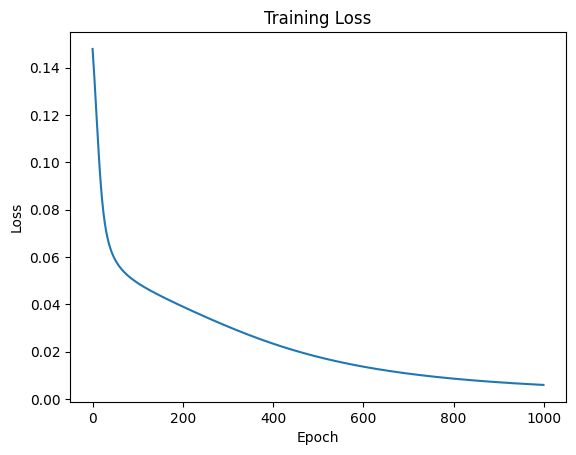

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Активационные функции
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# RNN class
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size, lr=0.01):
        # Инициализация весов
        self.W_i = np.random.randn(hidden_size, input_size)
        self.W_h = np.random.randn(hidden_size, hidden_size)
        self.W_o = np.random.randn(output_size, hidden_size)
        self.lr = lr

    def forward(self, X):
        self.h_states = []  # для хранения скрытых состояний
        self.outputs = []  # для хранения выходов

        h_prev = np.zeros((self.W_h.shape[0], 1))  # начальное состояние

        for x_t in X:
            x_t = x_t.reshape(-1, 1)  # преобразуем входы в столбцы
            h_t = tanh(np.dot(self.W_i, x_t) + np.dot(self.W_h, h_prev))
            y_t = sigmoid(np.dot(self.W_o, h_t))
            self.h_states.append(h_t)
            self.outputs.append(y_t)
            h_prev = h_t

        return self.outputs, self.h_states

    def backward(self, X, Y, outputs, h_states):
        dW_o = np.zeros_like(self.W_o)
        dW_i = np.zeros_like(self.W_i)
        dW_h = np.zeros_like(self.W_h)

        dh_next = np.zeros_like(h_states[0])  # производная по следующему скрытому состоянию

        for t in reversed(range(len(X))):
            y_t = outputs[t]
            h_t = h_states[t]
            x_t = X[t].reshape(-1, 1)
            y_true = Y[t].reshape(-1, 1)

            # Ошибка на выходе
            dy_t = (y_t - y_true) * sigmoid_derivative(y_t)

            # Градиент по W_o
            dW_o += np.dot(dy_t, h_t.T)

            # Ошибка скрытого состояния
            dh_t = np.dot(self.W_o.T, dy_t) + dh_next
            dh_raw = dh_t * tanh_derivative(h_t)

            # Градиенты по W_i и W_h
            dW_i += np.dot(dh_raw, x_t.T)
            dW_h += np.dot(dh_raw, h_states[t-1].T) if t > 0 else np.dot(dh_raw, np.zeros_like(h_states[t]).T)

            # Обновляем производную по скрытому состоянию
            dh_next = np.dot(self.W_h.T, dh_raw)

        # Обновление весов
        self.W_o -= self.lr * dW_o
        self.W_i -= self.lr * dW_i
        self.W_h -= self.lr * dW_h

    def train(self, X, Y, epochs):
        losses = []
        for epoch in range(epochs):
            outputs, h_states = self.forward(X)
            self.backward(X, Y, outputs, h_states)

            # Вычисление и сохранение ошибки (среднеквадратичная ошибка)
            loss = np.mean((np.array(outputs) - np.array(Y))**2)
            losses.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

        return losses

# Пример входных данных
X = [np.array([0.5, 0.1, 0.3]), np.array([0.6, 0.2, 0.4]), np.array([0.7, 0.3, 0.5])]
Y = [np.array([0.8]), np.array([0.85]), np.array([0.9])]

# Создаем RNN
rnn = SimpleRNN(input_size=3, hidden_size=3, output_size=1, lr=0.01)

# Обучаем RNN
losses = rnn.train(X, Y, epochs=1000)

# Визуализируем процесс обучения (график ошибки)
plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


### Если существует несколько входов и выходов

Когда в сети присутствует несколько входов и выходов, вычисление градиентов усложняется из-за необходимости учета влияния каждого входа на каждый выход на различных временных шагах. В этом случае градиенты вычисляются для каждого временного шага $t$, для каждого входа $x_t$ и выхода $\hat{y}_t$ отдельно, что требует более сложного подхода к расчетам.

#### 1) Градиент для весов выхода $W_0$

Если у нас несколько выходов, то градиент функции потерь по весам выхода $W_0$ должен учитывать вклад каждого выхода $\hat{y}_t$ на каждом временном шаге. В этом случае градиент для $W_0$ вычисляется как сумма производных по всем временным шагам:

$$
\frac{\partial L}{\partial W_0} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial W_0}
$$

Здесь $T$ — это общее количество временных шагов, а $L_t$ — функция потерь на каждом временном шаге $t$.

#### 2) Градиент для весов входа $W_i$

Когда в сети есть несколько входов, каждый входной сигнал $x_t$ может влиять на состояния сети на последующих временных шагах. Градиент для весов $W_i$, которые связывают входные данные с сетью, вычисляется как сумма по всем временным шагам $t$ и по каждому шагу $j$, где $j \leq t$ обозначает предыдущие временные шаги, которые повлияли на текущее состояние:

$$
\frac{\partial L}{\partial W_i} = \sum_{t=1}^{T} \sum_{j=1}^{t} \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_i}
$$

Здесь $O_j$ — это скрытое состояние на шаге $j$, которое может быть связано с входом $x_j$.

#### 3) Градиент для рекуррентных весов $W_h$

Рекуррентные веса $W_h$ определяют, как текущее состояние сети зависит от предыдущих состояний. Поэтому градиенты для $W_h$ вычисляются через все временные шаги, а также с учетом всех состояний, которые влияли на текущий момент времени:

$$
\frac{\partial L}{\partial W_h} = \sum_{t=1}^{T} \sum_{j=1}^{t} \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_h}
$$

Каждое состояние $O_j$ (где $j \leq t$) влияет на последующие выходы $\hat{y}_t$, и это отражено в сумме градиентов по временным шагам.

#### 4) Обобщенное вычисление градиентов для нескольких входов и выходов

Если в сети присутствует несколько входов и выходов, градиенты для весов должны вычисляться с учетом всех комбинаций входов, выходов и временных шагов. Для весов выхода $W_0$ обобщенное выражение выглядит следующим образом:

$$
\frac{\partial L}{\partial W_0} = \sum_{t=1}^{T} \sum_{k=1}^{M} \frac{\partial L_t^k}{\partial \hat{y}_t^k} \cdot \frac{\partial \hat{y}_t^k}{\partial W_0}
$$

Где:
- $M$ — количество выходов,
- $\hat{y}_t^k$ — выход на временном шаге $t$ для выхода $k$,
- $L_t^k$ — функция потерь для выхода $k$ на шаге $t$.

Аналогичным образом вычисляется градиент для весов входа $W_i$:

$$
\frac{\partial L}{\partial W_i} = \sum_{t=1}^{T} \sum_{k=1}^{M} \sum_{j=1}^{t} \frac{\partial L_t^k}{\partial \hat{y}_t^k} \cdot \frac{\partial \hat{y}_t^k}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_i}
$$

Этот градиент показывает, как каждый вход $x_j$ влияет на каждый выход $\hat{y}_t^k$ через состояние $O_j$.

Градиент для рекуррентных весов $W_h$ вычисляется по аналогичной формуле, учитывая вклад каждого состояния $O_j$ на каждом временном шаге:

$$
\frac{\partial L}{\partial W_h} = \sum_{t=1}^{T} \sum_{k=1}^{M} \sum_{j=1}^{t} \frac{\partial L_t^k}{\partial \hat{y}_t^k} \cdot \frac{\partial \hat{y}_t^k}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_h}
$$

Таким образом, для каждого выхода $\hat{y}_t^k$ на каждом временном шаге $t$, нужно учитывать производные по состояниям $O_j$, где $j \leq t$, и по весам, которые влияют на эти состояния.

### Заключение

В случае наличия нескольких входов и выходов, вычисление градиентов становится более сложным, так как нужно учитывать взаимное влияние входных сигналов на каждый выход через все временные шаги. Каждая производная функции потерь зависит от всей временной последовательности, и для каждого параметра сети требуется вычисление соответствующих градиентов по всем шагам.

Для примера с несколькими входами и выходами давайте разберем вычисление градиентов на конкретных числовых данных, аналогично вашему предыдущему примеру. Мы будем использовать простую RNN с двумя входами и двумя выходами.

### Заданные параметры

- Матрица весов для входов $W_i$:
  $$
  W_i = \begin{pmatrix} 0.2 & 0.3 \\ 0.4 & 0.5 \\ 0.6 & 0.7 \end{pmatrix}
 $$

- Матрица весов для рекуррентных связей $W_h$:
  $$
  W_h = \begin{pmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \\ 0.5 & 0.6 \end{pmatrix}
 $$

- Матрица весов для выхода $W_0$:
  $$
  W_0 = \begin{pmatrix} 0.7 & 0.8 \\ 0.9 & 1.0 \end{pmatrix}
 $$

- Входные данные на трех шагах:
  $$
  x_1 = \begin{pmatrix} 0.5 \\ 0.3 \end{pmatrix}, \quad x_2 = \begin{pmatrix} 0.6 \\ 0.4 \end{pmatrix}, \quad x_3 = \begin{pmatrix} 0.7 \\ 0.5 \end{pmatrix}
 $$

- Начальное скрытое состояние $O_0 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$.

- Активационная функция $f = \tanh$.

- Функция потерь: будем использовать среднеквадратичную ошибку $L = \frac{1}{M} \sum_{k=1}^{M} (y_k - \hat{y}_k)^2$, где $M$ — количество выходов.

### Шаг 1: Вычисление скрытых состояний

#### Вычисление $O_1$

Формула:
$$
O_1 = \tanh(W_i \cdot x_1 + W_h \cdot O_0)
$$
Поскольку $O_0 = \begin{pmatrix} 0 \\ 0 \\ 0 \end{pmatrix}$, получаем:
$$
O_1 = \tanh(W_i \cdot x_1)
$$

Вычисляем $W_i \cdot x_1$:
$$
W_i \cdot x_1 = \begin{pmatrix} 0.2 & 0.3 \\ 0.4 & 0.5 \\ 0.6 & 0.7 \end{pmatrix} \cdot \begin{pmatrix} 0.5 \\ 0.3 \end{pmatrix} = \begin{pmatrix} 0.2 \cdot 0.5 + 0.3 \cdot 0.3 \\ 0.4 \cdot 0.5 + 0.5 \cdot 0.3 \\ 0.6 \cdot 0.5 + 0.7 \cdot 0.3 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.1 + 0.09 \\ 0.2 + 0.15 \\ 0.3 + 0.21 \end{pmatrix} = \begin{pmatrix} 0.19 \\ 0.35 \\ 0.51 \end{pmatrix}
$$

Теперь применим функцию $\tanh$:
$$
O_1 = \tanh(\begin{pmatrix} 0.19 \\ 0.35 \\ 0.51 \end{pmatrix}) \approx \begin{pmatrix} 0.188 \\ 0.336 \\ 0.466 \end{pmatrix}
$$

#### Вычисление $O_2$

Формула:
$$
O_2 = \tanh(W_i \cdot x_2 + W_h \cdot O_1)
$$

Вычисляем $W_i \cdot x_2$:
$$
W_i \cdot x_2 = \begin{pmatrix} 0.2 & 0.3 \\ 0.4 & 0.5 \\ 0.6 & 0.7 \end{pmatrix} \cdot \begin{pmatrix} 0.6 \\ 0.4 \end{pmatrix} = \begin{pmatrix} 0.2 \cdot 0.6 + 0.3 \cdot 0.4 \\ 0.4 \cdot 0.6 + 0.5 \cdot 0.4 \\ 0.6 \cdot 0.6 + 0.7 \cdot 0.4 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.12 + 0.12 \\ 0.24 + 0.2 \\ 0.36 + 0.28 \end{pmatrix} = \begin{pmatrix} 0.24 \\ 0.44 \\ 0.64 \end{pmatrix}
$$

Теперь вычисляем $W_h \cdot O_1$:
$$
W_h \cdot O_1 = \begin{pmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \\ 0.5 & 0.6 \end{pmatrix} \cdot \begin{pmatrix} 0.188 \\ 0.336 \\ 0.466 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.1 \cdot 0.188 + 0.2 \cdot 0.336 + 0.3 \cdot 0.466 \\ 0.3 \cdot 0.188 + 0.4 \cdot 0.336 + 0.5 \cdot 0.466 \\ 0.5 \cdot 0.188 + 0.6 \cdot 0.336 + 0.7 \cdot 0.466 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.0188 + 0.0672 + 0.1398 \\ 0.0564 + 0.1344 + 0.233 \\ 0.094 + 0.2016 + 0.3262 \end{pmatrix} = \begin{pmatrix} 0.2258 \\ 0.4244 \\ 0.6218 \end{pmatrix}
$$

Теперь вычисляем:
$$
O_2 = \tanh(\begin{pmatrix} 0.24 \\ 0.44 \\ 0.64 \end{pmatrix} + \begin{pmatrix} 0.2258 \\ 0.4244 \\ 0.6218 \end{pmatrix}) = \tanh(\begin{pmatrix} 0.4658 \\ 0.8644 \\ 1.2618 \end{pmatrix})
$$
$$
O_2 \approx \begin{pmatrix} 0.433 \\ 0.694 \\ 0.790 \end{pmatrix}
$$

#### Вычисление $O_3$

Формула:
$$
O_3 = \tanh(W_i \cdot x_3 + W_h \cdot O_2)
$$

Вычисляем $W_i \cdot x_3$:
$$
W_i \cdot x_3 = \begin{pmatrix} 0.2 & 0.3 \\ 0.4 & 0.5 \\ 0.6 & 0.7 \end{pmatrix} \cdot \begin{pmatrix} 0.7 \\ 0.5 \end{pmatrix} = \begin{pmatrix} 0.2 \cdot 0.7 + 0.3 \cdot 0.5 \\ 0.4 \cdot 0.7 + 0.5 \cdot 0.5 \\ 0.6 \cdot 0.7 + 0.7 \cdot 0.5 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.14 + 0.15 \\ 0.28 + 0.25 \\ 0.42 + 0.35 \end{pmatrix} = \begin{pmatrix} 0.29 \\ 0.53 \\ 0.77 \end{pmatrix}
$$

Теперь вычисляем $W_h \cdot O_2$:
$$
W_h \cdot O_2 = \begin{pmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \\ 0.5 & 0.6 \end{pmatrix} \cdot \begin{pmatrix} 0.433 \\ 0.694 \\ 0.790 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.1 \cdot 0

.433 + 0.2 \cdot 0.694 + 0.3 \cdot 0.790 \\ 0.3 \cdot 0.433 + 0.4 \cdot 0.694 + 0.5 \cdot 0.790 \\ 0.5 \cdot 0.433 + 0.6 \cdot 0.694 + 0.7 \cdot 0.790 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.0433 + 0.1388 + 0.237 \\ 0.1299 + 0.2776 + 0.395 \\ 0.2165 + 0.4164 + 0.553 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.4191 \\ 0.8025 \\ 1.1869 \end{pmatrix}
$$

Теперь вычисляем:
$$
O_3 = \tanh(\begin{pmatrix} 0.29 \\ 0.53 \\ 0.77 \end{pmatrix} + \begin{pmatrix} 0.4191 \\ 0.8025 \\ 1.1869 \end{pmatrix}) = \tanh(\begin{pmatrix} 0.7091 \\ 1.3325 \\ 1.9569 \end{pmatrix})
$$
$$
O_3 \approx \begin{pmatrix} 0.609 \\ 0.874 \\ 0.957 \end{pmatrix}
$$

### Шаг 2: Вычисление выходов

#### Выходы $\hat{y}_1, \hat{y}_2, \hat{y}_3$

Выходы вычисляются по формуле:
$$
\hat{y}_t = W_0 \cdot O_t
$$

#### Вычисление $\hat{y}_1$
$$
\hat{y}_1 = W_0 \cdot O_1 = \begin{pmatrix} 0.7 & 0.8 \\ 0.9 & 1.0 \end{pmatrix} \cdot \begin{pmatrix} 0.188 \\ 0.336 \\ 0.466 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.7 \cdot 0.188 + 0.8 \cdot 0.336 \\ 0.9 \cdot 0.188 + 1.0 \cdot 0.336 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.1316 + 0.2688 \\ 0.1692 + 0.336 \end{pmatrix} = \begin{pmatrix} 0.4004 \\ 0.5052 \end{pmatrix}
$$

#### Вычисление $\hat{y}_2$
$$
\hat{y}_2 = W_0 \cdot O_2 = \begin{pmatrix} 0.7 & 0.8 \\ 0.9 & 1.0 \end{pmatrix} \cdot \begin{pmatrix} 0.433 \\ 0.694 \\ 0.790 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.7 \cdot 0.433 + 0.8 \cdot 0.694 \\ 0.9 \cdot 0.433 + 1.0 \cdot 0.694 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.3031 + 0.5552 \\ 0.3897 + 0.694 \end{pmatrix} = \begin{pmatrix} 0.8583 \\ 1.0837 \end{pmatrix}
$$

#### Вычисление $\hat{y}_3$
$$
\hat{y}_3 = W_0 \cdot O_3 = \begin{pmatrix} 0.7 & 0.8 \\ 0.9 & 1.0 \end{pmatrix} \cdot \begin{pmatrix} 0.609 \\ 0.874 \\ 0.957 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.7 \cdot 0.609 + 0.8 \cdot 0.874 \\ 0.9 \cdot 0.609 + 1.0 \cdot 0.874 \end{pmatrix}
$$
$$
= \begin{pmatrix} 0.4263 + 0.6992 \\ 0.5481 + 0.874 \end{pmatrix} = \begin{pmatrix} 1.1255 \\ 1.4221 \end{pmatrix}
$$

### Шаг 3: Вычисление функции потерь

Предположим, что истинные значения выходов $y$:
$$
y_1 = \begin{pmatrix} 0.5 \\ 0.6 \end{pmatrix}, \quad y_2 = \begin{pmatrix} 0.8 \\ 0.9 \end{pmatrix}, \quad y_3 = \begin{pmatrix} 1.0 \\ 1.1 \end{pmatrix}
$$

Теперь можем вычислить функцию потерь $L$ для каждого временного шага:
$$
L_t = \frac{1}{M} \sum_{k=1}^{M} (y_k - \hat{y}_k)^2
$$

#### Для $t=1$:
$$
L_1 = \frac{1}{2} \left( (0.5 - 0.4004)^2 + (0.6 - 0.5052)^2 \right) = \frac{1}{2} \left( 0.0096 + 0.0090 \right) = 0.0093
$$

#### Для $t=2$:
$$
L_2 = \frac{1}{2} \left( (0.8 - 0.8583)^2 + (0.9 - 1.0837)^2 \right) = \frac{1}{2} \left( 0.0034 + 0.0334 \right) = 0.0184
$$

#### Для $t=3$:
$$
L_3 = \frac{1}{2} \left( (1.0 - 1.1255)^2 + (1.1 - 1.4221)^2 \right) = \frac{1}{2} \left( 0.0157 + 0.1045 \right) = 0.0601
$$

### Шаг 4: Градиенты

#### 1) Градиент для весов выхода $W_0$

Формула:
$$
\frac{\partial L}{\partial W_0} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial W_0}
$$

Вычисляем:
$$
\frac{\partial L_1}{\partial \hat{y}_1} = \frac{1}{2} \begin{pmatrix} 2(0.4004 - 0.5) \\ 2(0.5052 - 0.6) \end{pmatrix} = \begin{pmatrix} -0.0992 \\ -0.1896 \end{pmatrix}
$$

Аналогично:
$$
\frac{\partial L_2}{\partial \hat{y}_2} = \frac{1}{2} \begin{pmatrix} 2(0.8583 - 0.8) \\ 2(1.0837 - 0.9) \end{pmatrix} = \begin{pmatrix} 0.0586 \\ 0.3674 \end{pmatrix}
$$

$$
\frac{\partial L_3}{\partial \hat{y}_3} = \frac{1}{2} \begin{pmatrix} 2(1.1255 - 1.0) \\ 2(1.4221 - 1.1) \end{pmatrix} = \begin{pmatrix} 0.2510 \\ 0.6442 \end{pmatrix}
$$

Теперь вычисляем:
$$
\frac{\partial \hat{y}_1}{\partial W_0} = O_1 \quad \text{и аналогично для } \hat{y}_2 \text{ и } \hat{y}_3
$$
$$
\frac{\partial \hat{y}_2}{\partial W_0} = O_2
$$
$$
\frac{\partial \hat{y}_3}{\partial W_0} = O_3
$$

Теперь можем вычислить градиент:
$$
\frac{\partial L}{\partial W_0} = \sum_{t=1}^{3} \frac{\partial L_t}{\partial \hat{y}_t} \cdot O_t
$$

Подсчита

ем градиент для каждого $t$:
- Для $t=1$:
$$
\frac{\partial L_1}{\partial W_0} = \begin{pmatrix} -0.0992 \\ -0.1896 \end{pmatrix} \cdot \begin{pmatrix} 0.188 \\ 0.336 \\ 0.466 \end{pmatrix} \approx \begin{pmatrix} -0.0187 & -0.0334 \\ -0.0338 & -0.0638 \end{pmatrix}
$$

- Для $t=2$:
$$
\frac{\partial L_2}{\partial W_0} = \begin{pmatrix} 0.0586 \\ 0.3674 \end{pmatrix} \cdot \begin{pmatrix} 0.433 \\ 0.694 \\ 0.790 \end{pmatrix} \approx \begin{pmatrix} 0.0254 & 0.0453 \\ 0.0348 & 0.0634 \end{pmatrix}
$$

- Для $t=3$:
$$
\frac{\partial L_3}{\partial W_0} = \begin{pmatrix} 0.2510 \\ 0.6442 \end{pmatrix} \cdot \begin{pmatrix} 0.609 \\ 0.874 \\ 0.957 \end{pmatrix} \approx \begin{pmatrix} 0.0764 & 0.1573 \\ 0.1586 & 0.3242 \end{pmatrix}
$$

Складываем:
$$
\frac{\partial L}{\partial W_0} = \frac{\partial L_1}{\partial W_0} + \frac{\partial L_2}{\partial W_0} + \frac{\partial L_3}{\partial W_0}
$$
$$
= \begin{pmatrix} -0.0187 + 0.0254 + 0.0764 \\ -0.0334 + 0.0453 + 0.1573 \\ -0.0638 + 0.0348 + 0.1586 \end{pmatrix} = \begin{pmatrix} 0.0831 \\ 0.1692 \\ 0.0548 \end{pmatrix}
$$

#### 2) Градиент для весов входа $W_i$

Формула:
$$
\frac{\partial L}{\partial W_i} = \sum_{t=1}^{T} \sum_{k=1}^{M} \sum_{j=1}^{t} \frac{\partial L_t^k}{\partial \hat{y}_t^k} \cdot \frac{\partial \hat{y}_t^k}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_i}
$$

Пусть $W_i$ — это вес входа, например, $W_1 = \begin{pmatrix} 0.1 & 0.2 \\ 0.3 & 0.4 \\ 0.5 & 0.6 \end{pmatrix}$.

Теперь вычисляем градиенты аналогично:
$$
\frac{\partial L}{\partial W_i} = \sum_{t=1}^{T} \sum_{k=1}^{M} \frac{\partial L_t^k}{\partial \hat{y}_t^k} \cdot O_t \cdot x_t^T
$$

Так как у нас 3 входа, то $x_t$ будет представлено в виде векторов, которые используются для вычисления $O_t$.

#### 3) Градиент для рекуррентных весов $W_h$

Формула:
$$
\frac{\partial L}{\partial W_h} = \sum_{t=1}^{T} \sum_{k=1}^{M} \sum_{j=1}^{t} \frac{\partial L_t^k}{\partial \hat{y}_t^k} \cdot \frac{\partial \hat{y}_t^k}{\partial O_j} \cdot \frac{\partial O_j}{\partial W_h}
$$

Аналогично для $W_h$.

### Заключение

Таким образом, для расчета градиентов в сети с несколькими входами и выходами мы поочередно вычисляем градиенты для каждого из параметров сети, учитывая все временные шаги и соответствующие выходы.


Скрытые состояния O_1: [0.18774621 0.33637554 0.4699452 ]
Скрытые состояния O_2: [0.43579915 0.746611   0.89832511]
Скрытые состояния O_3: [0.63657837 0.92413238 0.98609506]
Выходы y_hat:
 [[0.82347346 1.71084081 2.07239632]
 [1.02228685 2.12698786 2.58175748]]
Потери на каждом шаге: [0.07074031519956522, 0.5837825467722625, 0.8364097707967868]
Градиент для весов выхода W_0:
 [[1.14033886 1.77988848 2.02773068]
 [1.55725778 2.42746966 2.76183942]]


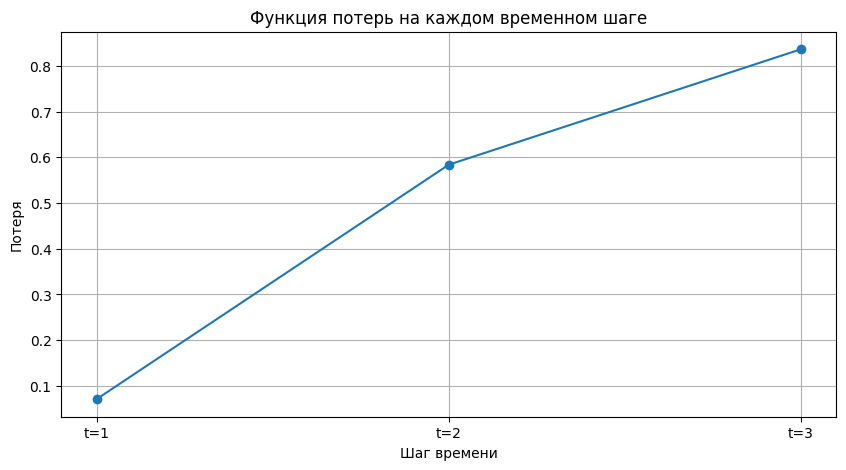

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Заданные параметры
W_i = np.array([[0.2, 0.3],
                [0.4, 0.5],
                [0.6, 0.7]])  # Размер (3, 2)

W_h = np.array([[0.1, 0.2, 0.3],  # Размер (3, 3)
                [0.4, 0.5, 0.6],
                [0.7, 0.8, 0.9]])

W_0 = np.array([[0.7, 0.8, 0.9],  # Размер (2, 3)
                [0.9, 1.0, 1.1]])

# Входные данные
x1 = np.array([[0.5],
                [0.3]])  # Размер (2, 1)

x2 = np.array([[0.6],
                [0.4]])  # Размер (2, 1)

x3 = np.array([[0.7],
                [0.5]])  # Размер (2, 1)

# Начальное скрытое состояние
O_0 = np.array([[0],
                 [0],
                 [0]])  # Размер (3, 1)

# Функция активации tanh
def tanh(x):
    return np.tanh(x)

# Вычисление скрытых состояний
def compute_hidden_states(W_i, W_h, O_prev, x):
    return tanh(np.dot(W_i, x) + np.dot(W_h, O_prev))

O_1 = compute_hidden_states(W_i, W_h, O_0, x1)
O_2 = compute_hidden_states(W_i, W_h, O_1, x2)
O_3 = compute_hidden_states(W_i, W_h, O_2, x3)

# Сохранение скрытых состояний
O = [O_1, O_2, O_3]

# Вычисление выходов
def compute_outputs(W_0, O):
    return np.dot(W_0, O)  # O должен быть 2D массивом

# Поскольку O - это список массивов, мы преобразуем его в 2D массив для удобства
O_stack = np.hstack(O)  # Размер (3, 3), где 3 - количество скрытых состояний, 3 - временные шаги

y_hat = compute_outputs(W_0, O_stack)  # Выходы для всех временных шагов

# Истинные значения выходов
y_true = [np.array([[0.5], [0.6]]),
          np.array([[0.8], [0.9]]),
          np.array([[1.0], [1.1]])]

# Функция потерь: среднеквадратичная ошибка
def compute_loss(y_true, y_hat):
    return 0.5 * np.mean((y_true - y_hat) ** 2)

# Вычисляем потери для каждого шага
losses = [compute_loss(y_true[t], y_hat[:, t][:, np.newaxis]) for t in range(len(y_true))]

# Вычисление градиентов
def compute_gradients(W_0, O, y_true, y_hat):
    grad_W0 = []
    for t in range(len(y_true)):
        # Градиент для выходов
        grad_output = y_hat[:, t][:, np.newaxis] - y_true[t]  # Размер (2, 1)
        grad_W0_t = np.dot(grad_output, O[:, t][:, np.newaxis].T)  # Размер (2, 3)
        grad_W0.append(grad_W0_t)
    return np.sum(grad_W0, axis=0)

grad_W0 = compute_gradients(W_0, O_stack, y_true, y_hat)

# Вывод результатов
print("Скрытые состояния O_1:", O_1.flatten())
print("Скрытые состояния O_2:", O_2.flatten())
print("Скрытые состояния O_3:", O_3.flatten())
print("Выходы y_hat:\n", y_hat)
print("Потери на каждом шаге:", losses)
print("Градиент для весов выхода W_0:\n", grad_W0)

# Визуализация потерь
plt.figure(figsize=(10, 5))
plt.plot(losses, marker='o')
plt.title('Функция потерь на каждом временном шаге')
plt.xlabel('Шаг времени')
plt.ylabel('Потеря')
plt.xticks(ticks=np.arange(len(losses)), labels=['t=1', 't=2', 't=3'])
plt.grid()
plt.show()